# DSCI 552 | Homework 6

*Please note that I have used 2 late days for the submission of this assignment*

## APS Failure Data

### 1. Tree Based Methods

| Key             | Value           |
| --------------- | --------------- |
| Submitted By    | Ruchit Bhardwaj |
| USC ID          | 1111-4177-99    |
| Github Username | ruch0401        |


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
import pprint
from xgboost import XGBClassifier
from sklearn import svm
from sklearn.model_selection import LeaveOneOut, GridSearchCV,StratifiedKFold ,KFold
# from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
import sklearn.metrics as metrics
from sklearn.metrics import roc_auc_score, auc, accuracy_score
!python -m pip install imblearn
from imblearn.over_sampling import SMOTE


warnings.filterwarnings('ignore')

**1(a). Download the APS Failure data from: https://archive.ics.uci.edu/ml/datasets/APS+Failure+at+Scania+Trucks. The dataset contains a training set and a test set. The training set contains 60,000 rows, of which 1,000 belong to the positive class and 171 columns, of which one is the class column. All attributes are numeric**

In [2]:
aps_failure_training_file = '../data/aps_failure_training_set.csv'
aps_failure_testing_file = '../data/aps_failure_test_set.csv'
aps_failure_description_file = '../data/aps_failure_description.txt'

In [3]:
aps_train_df = pd.read_csv(aps_failure_training_file, skiprows=20, na_values='na')
aps_test_df = pd.read_csv(aps_failure_testing_file, skiprows=20, na_values='na')
print("Training Data Shape: ", aps_train_df.shape)
print("Testing Data Shape: ", aps_test_df.shape)

Training Data Shape:  (60000, 171)
Testing Data Shape:  (16000, 171)


In [4]:
aps_train_df

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,NaN,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,neg,33058,NaN,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,neg,41040,NaN,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,neg,12,0.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,neg,60874,NaN,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,neg,153002,NaN,6.640000e+02,186.0,0.0,0.0,0.0,0.0,0.0,...,998500.0,566884.0,1290398.0,1218244.0,1019768.0,717762.0,898642.0,28588.0,0.0,0.0
59996,neg,2286,NaN,2.130707e+09,224.0,0.0,0.0,0.0,0.0,0.0,...,10578.0,6760.0,21126.0,68424.0,136.0,0.0,0.0,0.0,0.0,0.0
59997,neg,112,0.0,2.130706e+09,18.0,0.0,0.0,0.0,0.0,0.0,...,792.0,386.0,452.0,144.0,146.0,2622.0,0.0,0.0,0.0,0.0
59998,neg,80292,NaN,2.130706e+09,494.0,0.0,0.0,0.0,0.0,0.0,...,699352.0,222654.0,347378.0,225724.0,194440.0,165070.0,802280.0,388422.0,0.0,0.0


In [5]:
aps_test_df

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,60,0.0,2.000000e+01,12.0,0.0,0.0,0.0,0.0,0.0,...,1098.0,138.0,412.0,654.0,78.0,88.0,0.0,0.0,0.0,0.0
1,neg,82,0.0,6.800000e+01,40.0,0.0,0.0,0.0,0.0,0.0,...,1068.0,276.0,1620.0,116.0,86.0,462.0,0.0,0.0,0.0,0.0
2,neg,66002,2.0,2.120000e+02,112.0,0.0,0.0,0.0,0.0,0.0,...,495076.0,380368.0,440134.0,269556.0,1315022.0,153680.0,516.0,0.0,0.0,0.0
3,neg,59816,NaN,1.010000e+03,936.0,0.0,0.0,0.0,0.0,0.0,...,540820.0,243270.0,483302.0,485332.0,431376.0,210074.0,281662.0,3232.0,0.0,0.0
4,neg,1814,NaN,1.560000e+02,140.0,0.0,0.0,0.0,0.0,0.0,...,7646.0,4144.0,18466.0,49782.0,3176.0,482.0,76.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,neg,81852,NaN,2.130706e+09,892.0,0.0,0.0,0.0,0.0,0.0,...,632658.0,273242.0,510354.0,373918.0,349840.0,317840.0,960024.0,25566.0,0.0,0.0
15996,neg,18,0.0,5.200000e+01,46.0,8.0,26.0,0.0,0.0,0.0,...,266.0,44.0,46.0,14.0,2.0,0.0,0.0,0.0,0.0,0.0
15997,neg,79636,NaN,1.670000e+03,1518.0,0.0,0.0,0.0,0.0,0.0,...,806832.0,449962.0,778826.0,581558.0,375498.0,222866.0,358934.0,19548.0,0.0,0.0
15998,neg,110,NaN,3.600000e+01,32.0,0.0,0.0,0.0,0.0,0.0,...,588.0,210.0,180.0,544.0,1004.0,1338.0,74.0,0.0,0.0,0.0


**1(b). Data Preparation  
This data set has missing values. When the number of data with missing values is significant, discarding them is not a good idea**

*1(b)-i. Research what types of techniques are usually used for dealing with data with missing values. Pick at least one of them and apply it to this data in the next steps.*

**Answer:**
> Some of the imputation techniques as mentioned in the official sklearn documentation are as follows - https://scikit-learn.org/stable/modules/impute.html
> - 6.4.1. Univariate vs. Multivariate Imputation
> - 6.4.2. Univariate feature imputation
> - 6.4.3. Multivariate feature imputation
> - 6.4.4. References
> - 6.4.5. Nearest neighbors imputation
> - 6.4.6. Marking imputed values
> - 6.4.7. Estimators that handle NaN values

> The data that we are dealing with is univariate data, the generic way to impute missing values for such kind of data is to use one of mean, median, etc. For this example, I will be making use of the mean to perform imputation for the missing data 

In [6]:
def get_X_Y_split(df):
    x_data = df.iloc[:, 1:]
    y_data = df.iloc[:, 0:1]
    return x_data, y_data

In [7]:
aps_train_df_x, aps_train_df_y = get_X_Y_split(aps_train_df)
aps_test_df_x, aps_test_df_y = get_X_Y_split(aps_test_df)

In [8]:
print("APS Training Data Features Shape: ", aps_train_df_x.shape)
print("APS Training Data Label Shape: ", aps_train_df_y.shape)

print("APS Testing Data Features Shape: ", aps_test_df_x.shape)
print("APS Testing Data Label Shape: ", aps_test_df_y.shape)

APS Training Data Features Shape:  (60000, 170)
APS Training Data Label Shape:  (60000, 1)
APS Testing Data Features Shape:  (16000, 170)
APS Testing Data Label Shape:  (16000, 1)


In [9]:
from sklearn.impute import SimpleImputer

def impute(df):
    imputer = SimpleImputer(strategy='mean', missing_values=np.nan)
    temp1 = imputer.fit_transform(df)
    imputed_df = pd.DataFrame(temp1, columns=df.columns)
    return imputed_df

In [10]:
imputed_aps_train_df_x = impute(aps_train_df_x)
imputed_aps_test_df_x = impute(aps_test_df_x)

In [11]:
imputed_aps_train_df_x

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,76698.0,0.713189,2.130706e+09,280.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,33058.0,0.713189,0.000000e+00,190620.639314,0.0,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,41040.0,0.713189,2.280000e+02,100.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,12.0,0.000000,7.000000e+01,66.000000,0.0,10.0,0.0,0.0,0.0,318.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,60874.0,0.713189,1.368000e+03,458.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,153002.0,0.713189,6.640000e+02,186.000000,0.0,0.0,0.0,0.0,0.0,2564.0,...,998500.0,566884.0,1290398.0,1218244.0,1019768.0,717762.0,898642.0,28588.0,0.0,0.0
59996,2286.0,0.713189,2.130707e+09,224.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,10578.0,6760.0,21126.0,68424.0,136.0,0.0,0.0,0.0,0.0,0.0
59997,112.0,0.000000,2.130706e+09,18.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,792.0,386.0,452.0,144.0,146.0,2622.0,0.0,0.0,0.0,0.0
59998,80292.0,0.713189,2.130706e+09,494.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,699352.0,222654.0,347378.0,225724.0,194440.0,165070.0,802280.0,388422.0,0.0,0.0


In [12]:
imputed_aps_test_df_x

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,60.0,0.000000,2.000000e+01,12.0,0.0,0.0,0.0,0.0,0.0,2682.0,...,1098.0,138.0,412.0,654.0,78.0,88.0,0.0,0.0,0.0,0.0
1,82.0,0.000000,6.800000e+01,40.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1068.0,276.0,1620.0,116.0,86.0,462.0,0.0,0.0,0.0,0.0
2,66002.0,2.000000,2.120000e+02,112.0,0.0,0.0,0.0,0.0,0.0,199486.0,...,495076.0,380368.0,440134.0,269556.0,1315022.0,153680.0,516.0,0.0,0.0,0.0
3,59816.0,0.772065,1.010000e+03,936.0,0.0,0.0,0.0,0.0,0.0,0.0,...,540820.0,243270.0,483302.0,485332.0,431376.0,210074.0,281662.0,3232.0,0.0,0.0
4,1814.0,0.772065,1.560000e+02,140.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7646.0,4144.0,18466.0,49782.0,3176.0,482.0,76.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,81852.0,0.772065,2.130706e+09,892.0,0.0,0.0,0.0,0.0,0.0,0.0,...,632658.0,273242.0,510354.0,373918.0,349840.0,317840.0,960024.0,25566.0,0.0,0.0
15996,18.0,0.000000,5.200000e+01,46.0,8.0,26.0,0.0,0.0,0.0,0.0,...,266.0,44.0,46.0,14.0,2.0,0.0,0.0,0.0,0.0,0.0
15997,79636.0,0.772065,1.670000e+03,1518.0,0.0,0.0,0.0,0.0,0.0,0.0,...,806832.0,449962.0,778826.0,581558.0,375498.0,222866.0,358934.0,19548.0,0.0,0.0
15998,110.0,0.772065,3.600000e+01,32.0,0.0,0.0,0.0,0.0,0.0,0.0,...,588.0,210.0,180.0,544.0,1004.0,1338.0,74.0,0.0,0.0,0.0


*1(b)-ii. For each of the 170 features, calculate the coefficient of variation $CV=s/m$, where $s$ is sample standard deviation and $m$ is sample mean.*

In [13]:
def calculate_cv(df):
    describe = df.describe(include='all')
    std = describe.loc['std']
    mean = describe.loc['mean']
    describe.loc['CV'] = std / mean
    return describe.loc[['std','mean','CV']]

In [14]:
cv_df = calculate_cv(imputed_aps_train_df_x)
cv_df

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
std,145430.056532,1.660588,7.724678e+08,3.504515e+07,158.142022,205.375337,20363.631242,34008.750683,149479.100501,757459.796689,...,1.149060e+06,540272.166338,1.161763e+06,1.114758e+06,1.063164e+06,1.718366e+06,446989.425928,47204.242869,4.268529,8.627929
mean,59336.499567,0.713189,3.560143e+08,1.906206e+05,6.819130,11.006817,221.636367,975.722261,8606.014529,88591.281094,...,4.454897e+05,211126.447302,4.457343e+05,3.939462e+05,3.330582e+05,3.462714e+05,138729.983179,8388.914629,0.090579,0.212756
CV,2.450938,2.328400,2.169767e+00,1.838476e+02,23.190937,18.658921,91.878565,34.854950,17.369143,8.550049,...,2.579319e+00,2.558998,2.606402e+00,2.829722e+00,3.192128e+00,4.962483e+00,3.222010,5.626979,47.124953,40.553250


In [15]:
# features with decreasing order of coefficient of variance
cv_df_sorted = cv_df.loc['CV'].sort_values(ascending=False)
cv_df_sorted

cs_009    235.277605
cf_000    184.233092
co_000    183.949017
ad_000    183.847620
dh_000    114.984991
             ...    
bo_000      0.462564
bp_000      0.425967
bq_000      0.399192
br_000      0.382669
cd_000      0.000000
Name: CV, Length: 170, dtype: float64

*1(b)-iii. Plot a correlation matrix for your features using pandas or any other tool.*

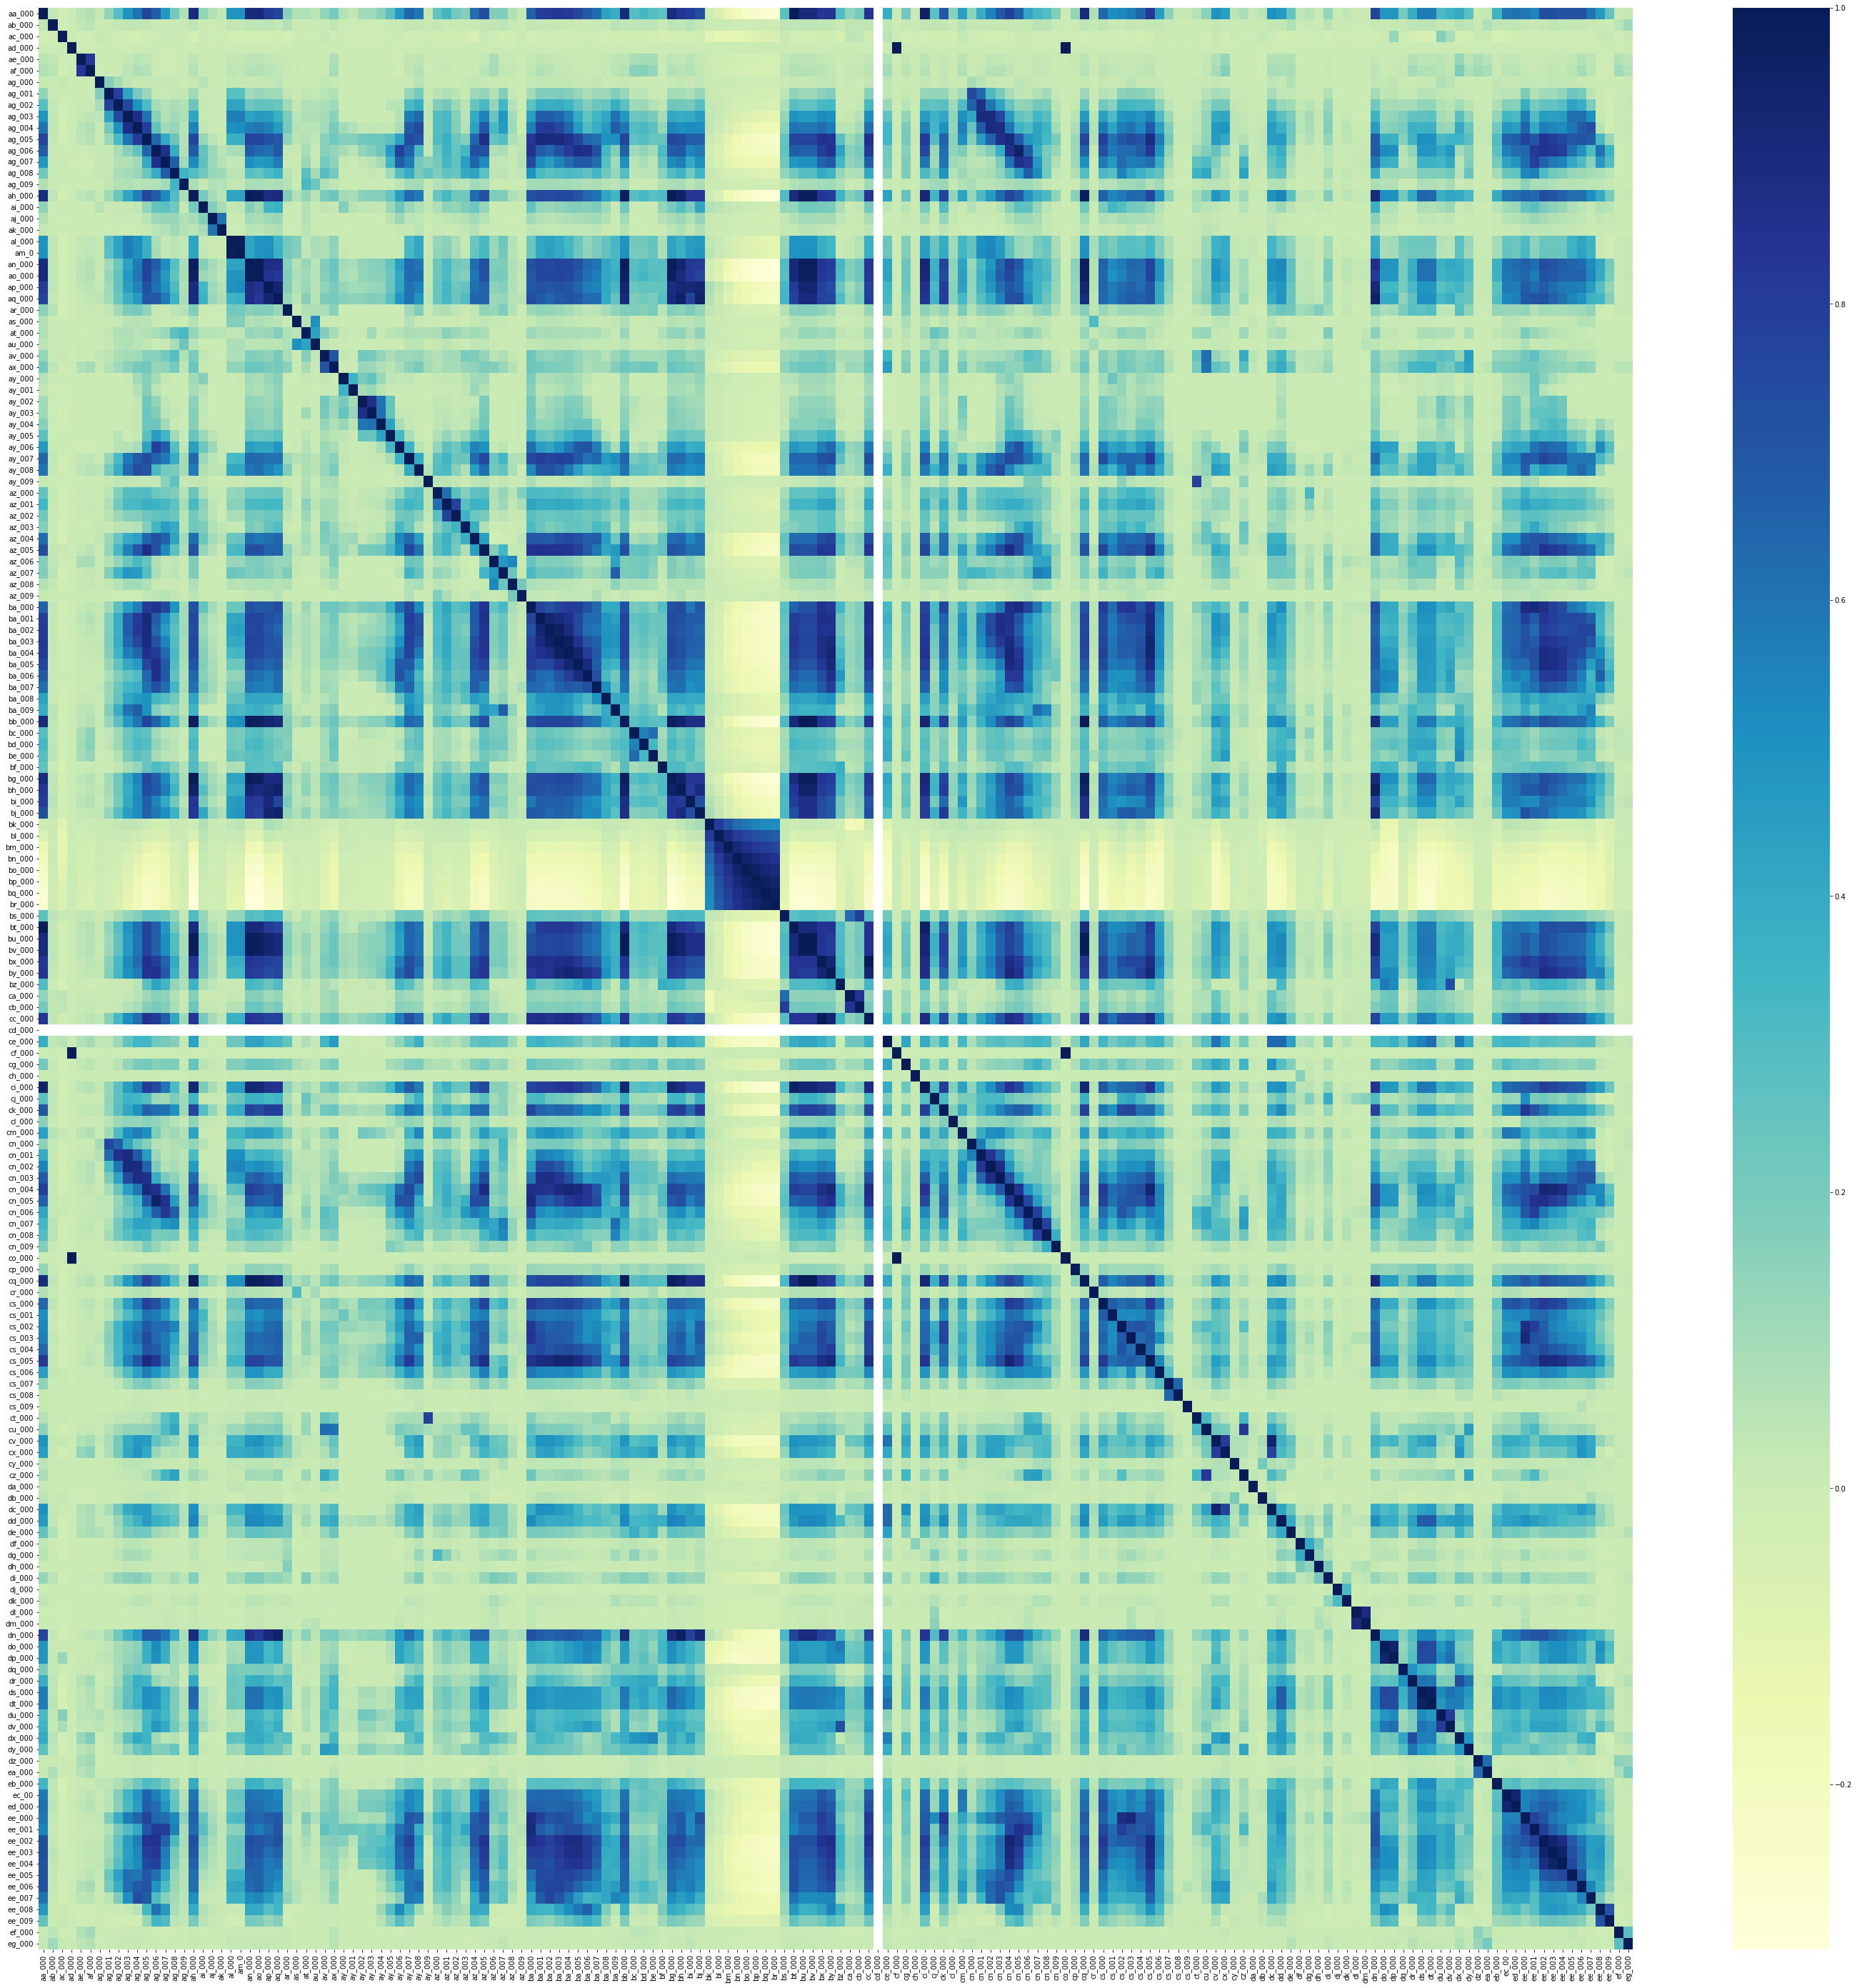

In [16]:
plt.figure(figsize=(50, 50))
corr = imputed_aps_train_df_x.corr()
sns.heatmap(corr, cmap="YlGnBu")
plt.show()

*1(b)-iv. Pick $\lfloor\sqrt{170}\rfloor$ features with highest $CV$, and make scatter plots and box plots for them, similar to those on p. 129 of ISLR. Can you draw conclusions about significance of those features, just by the scatter plots? This does not mean that you will only use those features in the following questions. We picked them only for visualization.*

In [17]:
features_to_select = int(np.sqrt(170))
highest_cv_features = cv_df_sorted[:features_to_select]
highest_cv_features

cs_009    235.277605
cf_000    184.233092
co_000    183.949017
ad_000    183.847620
dh_000    114.984991
dj_000    109.647285
ag_000     91.878565
as_000     86.416904
ay_009     83.786063
az_009     76.967978
ak_000     74.526688
au_000     68.160554
ch_000     58.268229
Name: CV, dtype: float64

In [18]:
def get_pairplot(df, top_cv_features):
    sns.pairplot(df[top_cv_features.index], diag_kind=None)
    plt.show()

In [19]:
def plot_box_plots(df):
    fig, axes = plt.subplots(figsize=(12, 7))
    box = sns.boxplot(data=df, ax=axes, orient='h')
    box.set(xscale="log")
    plt.plot()

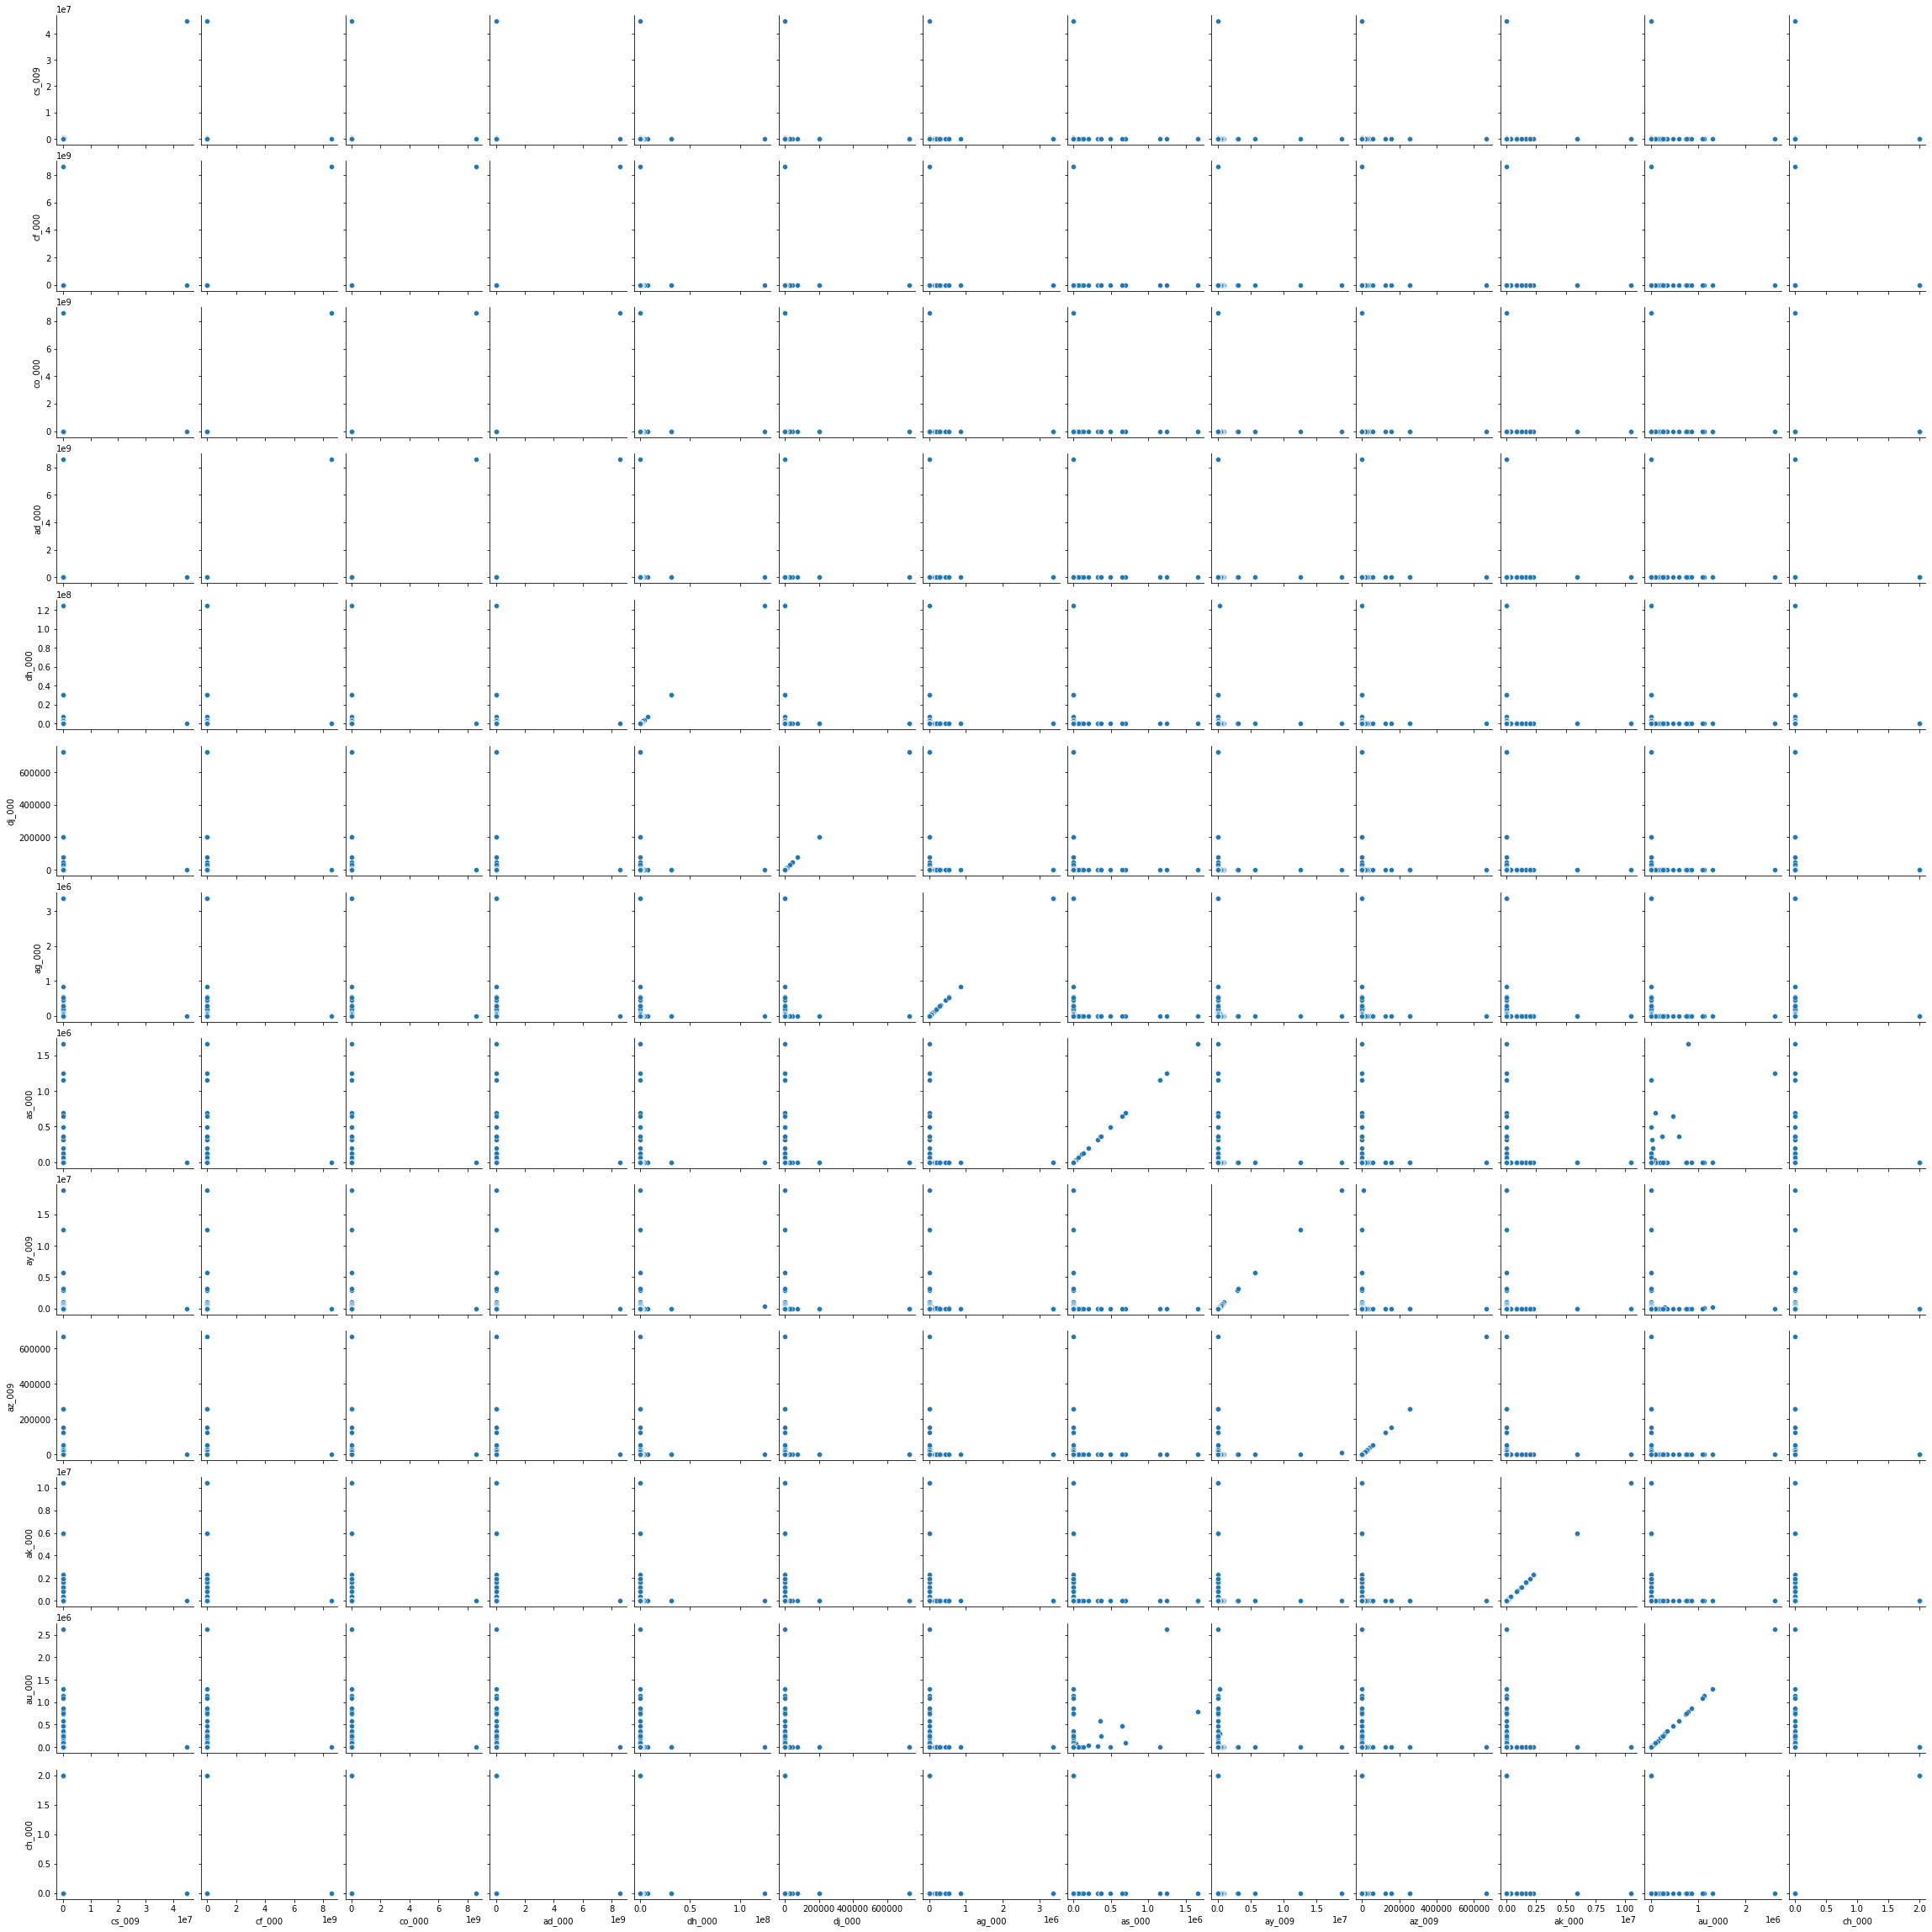

In [20]:
# Please note that creating pairplots for 60k records was blocking anaconda and hence, I have taken a 
# sample of 1000 records. According to the reference, a 1000 records are generally sufficient to get a sense of 
# how the datapoints are behaving
# https://stackoverflow.com/questions/37612434/what-are-ways-to-speed-up-seaborns-pairplot
# get_pairplot(imputed_aps_train_df_x.sample(1000), highest_cv_features)
get_pairplot(imputed_aps_train_df_x, highest_cv_features)

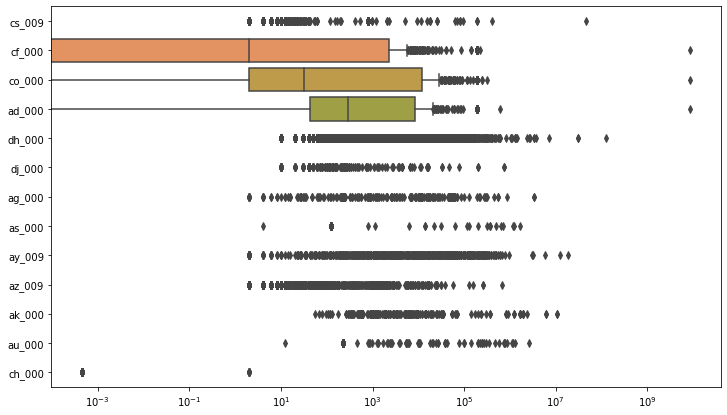

In [21]:
plot_box_plots(imputed_aps_train_df_x[highest_cv_features.index.to_list()])

**Observations:**
> The scatteplots are truely scattered and it seems that no conclusion can be drawn solely from the scatterplot alone. Since the imputation strategy used is mean, any outlier can easily affect the datapoint.

*1(b)-v. Determine the number of positive and negative data. Is this data set imbalanced?*

In [22]:
aps_train_df_y.value_counts()

class
neg      59000
pos       1000
dtype: int64

In [23]:
aps_test_df_y.value_counts()

class
neg      15625
pos        375
dtype: int64

**Observations:**
> We can clearly see that for both the training and the testing set, the dataset is imbalanced.

**1(c). Train a random forest to classify the data set. Do NOT compensate for class imbalance in the data set. Calculate the confusion matrix, ROC, AUC, and misclassification for training and test sets and report them (You may use pROC package). Calculate Out of Bag error estimate for your random forset and compare it to the test error**

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, roc_curve, auc, f1_score, accuracy_score

In [25]:
def calculate_confusion_matrix(ground_truth, predicted_truth):
    conf_matrix = confusion_matrix(ground_truth, predicted_truth)
    print(f'Confusion Matrix is: \n{conf_matrix}')
    print("\n")

In [26]:
def calculate_accuracy_score(ground_truth, predicted_truth):
    calculated_accuracy_score = accuracy_score(ground_truth, predicted_truth)
    print(f'Accuracy Score is: {round(calculated_accuracy_score, 4)}')
    print("\n")

In [27]:
def get_roc_auc_score(ground_truth, predicted_truth):
    calculated_roc_auc_score = roc_auc_score(ground_truth, predicted_truth)
    print(f'ROC AUC Score is: {round(calculated_roc_auc_score, 4)}')
    print("\n")

In [28]:
# utility method to plot the ROC curve and AUC
def plot_roc_curve(actualY, predictedY_prob, title, is_for_xgboost=False):
    fig, axes = plt.subplots(figsize=(12, 7))
    axes.set_title(f"ROC curves for {title}")
    y_predicted = predictedY_prob[:, 1]
    if not is_for_xgboost:
        fpr, tpr, thresholds = roc_curve(actualY, y_predicted, pos_label='pos')
    else:
        fpr, tpr, thresholds = roc_curve(actualY, y_predicted)
    roc_auc = auc(fpr, tpr)
    axes.plot(fpr, tpr, label=f"ROC Curve Area: {round(roc_auc, 4)}")
    axes.plot([0, 1], [0, 1], "--")
    axes.set_xlabel("False Positive Rate")
    axes.set_ylabel("True Positive Rate")
    axes.legend()
    plt.show()

In [29]:
def fit_random_forest(data_x, data_y, is_balanced=False):
    if not is_balanced:
        RF_model = RandomForestClassifier(max_depth=5, 
                                          random_state=60000,
                                          oob_score=True)
    else:
        RF_model = RandomForestClassifier(max_depth=5, 
                                          random_state=60000,
                                          class_weight='balanced',
                                          oob_score=True)
    RF_model.fit(data_x, data_y)
    return RF_model

In [30]:
def calculate_model_summary(ground_truth, predicted_truth, prob, title, is_for_xgboost=False):
    calculate_accuracy_score(ground_truth, predicted_truth)
    calculate_confusion_matrix(ground_truth, predicted_truth)
    if is_for_xgboost:
        get_roc_auc_score(ground_truth, predicted_truth)
    plot_roc_curve(ground_truth, prob, title, is_for_xgboost)

Accuracy Score is: 0.992


Confusion Matrix is: 
[[58972    28]
 [  450   550]]




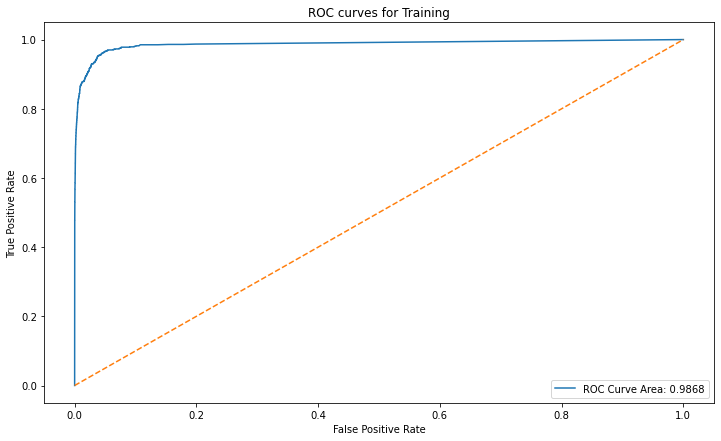

In [31]:
# build random forest model, imbalanced
RF_model = fit_random_forest(imputed_aps_train_df_x, aps_train_df_y)
aps_train_y_predicted = RF_model.predict(imputed_aps_train_df_x)
aps_train_y_prob = RF_model.predict_proba(imputed_aps_train_df_x)
calculate_model_summary(aps_train_df_y, aps_train_y_predicted, aps_train_y_prob, "Training")

Accuracy Score is: 0.9879


Confusion Matrix is: 
[[15612    13]
 [  180   195]]




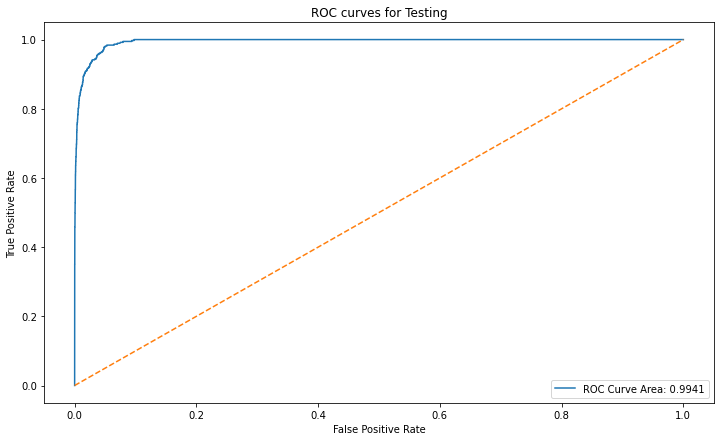

In [32]:
aps_test_y_predicted = RF_model.predict(imputed_aps_test_df_x)
aps_test_y_prob = RF_model.predict_proba(imputed_aps_test_df_x)
calculate_model_summary(aps_test_df_y, aps_test_y_predicted, aps_test_y_prob, "Testing")

In [33]:
# calculating oob error
train_oob_error = 1 - RF_model.oob_score_
test_error = 1 - accuracy_score(aps_test_df_y, aps_test_y_predicted)

data = {
    'Training OOB Error': [round(train_oob_error, 4)],
    'Testing Error': [round(test_error, 4)]
}
data = pd.DataFrame(data=data)
data

,Training OOB Error,Testing Error
0,0.0094,0.0121


**1(d). Research how class imbalance is addressed in random forests. Compensate for class imbalance in your random forest and repeat 1c. Compare the results with those of 1c.**

**Observation:**
> There seem to be 2 ways to handling class imbalance
> - BalancedRandomForestClassifier = A balanced random forest classifier. A balanced random forest randomly under-samples each boostrap sample to balance it.
> - RandomForestClassifier with class_weight='balanced' = Weights associated with classes in the form {class_label: weight}. If not given, all classes are supposed to have weight one. For multi-output problems, a list of dicts can be provided in the same order as the columns of y.

Here, I have used the second approach.

Accuracy Score is: 0.9589


Confusion Matrix is: 
[[56563  2437]
 [   31   969]]




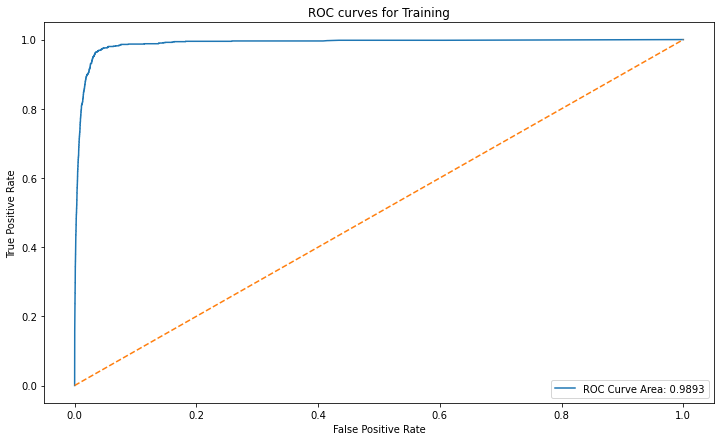

In [34]:
# build random forest model, imbalanced
RF_model = fit_random_forest(imputed_aps_train_df_x, aps_train_df_y, is_balanced=True)
aps_train_y_predicted = RF_model.predict(imputed_aps_train_df_x)
aps_train_y_prob = RF_model.predict_proba(imputed_aps_train_df_x)
calculate_model_summary(aps_train_df_y, aps_train_y_predicted, aps_train_y_prob, "Training")

Accuracy Score is: 0.9595


Confusion Matrix is: 
[[14992   633]
 [   15   360]]




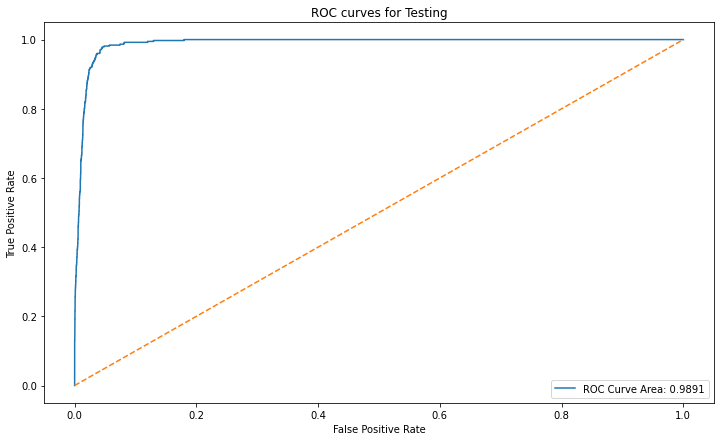

In [35]:
aps_test_y_predicted = RF_model.predict(imputed_aps_test_df_x)
aps_test_y_prob = RF_model.predict_proba(imputed_aps_test_df_x)
calculate_model_summary(aps_test_df_y, aps_test_y_predicted, aps_test_y_prob, "Testing")

In [36]:
# calculating oob error
train_oob_error = 1 - RF_model.oob_score_
test_error = 1 - accuracy_score(aps_test_df_y, aps_test_y_predicted)

data = {
    'Training OOB Error': [round(train_oob_error, 4)],
    'Testing Error': [round(test_error, 4)]
}
data = pd.DataFrame(data=data)
data

,Training OOB Error,Testing Error
0,0.0424,0.0405


**Observation:**
> This data set has imbalanced data due to which there is a possibility that the model tends to predict a sasmple as negative (or 'neg') to reach a higher accuracy. This might be the reason that we can see that the case without compensation has a better overall performance. As we can see from the confusion matrix, when the class weight is balanced, the model has a significant better prediction for the positive class 'pos'. For reference, its (195/375 v.s. 360/375) as per the data collected from the confusion matrices.

**1(e). XGBoost and Model Trees**  
**In the case of a univariate tree, only one input dimension is used at a tree split.
In a multivariate tree, or model tree, at a decision node all input dimensions can be used and thus it is more general. In univariate classification trees, majority polling is used at each node to determine the split of that node as the decision rule. In model trees, a (linear) model that relies on all of the variables is used to determine the split of that node (i.e. instead of using $X_j > s$ as the decision rule, one has $\sum_{j}\beta_{j}X_j > s$. as the decision rule). Alternatively, in a regression tree, instead of using average in the region associated with each node, a linear regression model is used to determine the value associated with that node. One of the methods that can be used at each node is Logistic Regression. Because the number of variables is large in this problem, one can use $L1$ penalized logistic regression at each node. You can use XGBoost to fit the model tree. Determine $\alpha$ (the regularization term) using cross-validation. Train the model for the APS data set without compensation for class imbalance. Use one of 5 fold, 10 fold, and leave-one-out cross validation methods to estimate the error of your trained model and compare it with the test error. Report the Confusion Matrix, ROC, and AUC for training and test sets**

In [37]:
ss = StandardScaler()
train_x_cols = imputed_aps_train_df_x.columns
test_x_cols = imputed_aps_test_df_x.columns
x_train = pd.DataFrame(ss.fit_transform(imputed_aps_train_df_x),columns=train_x_cols)
x_test = pd.DataFrame(ss.fit_transform(imputed_aps_test_df_x),columns=test_x_cols)

In [38]:
estimator = XGBClassifier(objective='binary:logistic',
                          colsample_bytree = 0.3, 
                          learning_rate = 0.1,
                          max_depth = 5,
                          use_label_encoder=False)
param_grid = {
    "reg_alpha": [0.01, 0.05,0.07,0.08,0.09, 0.1, 0.2, 0.5, 0.75, 1, 2, 3, 4, 5, 10, 20, 50, 100, 200]
}

In [39]:

aps_test_df_y['class'].replace({'neg':0,'pos':1},inplace=True)
aps_train_df_y

,class
0,neg
1,neg
2,neg
3,neg
4,neg
...,...
59995,neg
59996,neg
59997,neg
59998,neg


In [40]:
cv = KFold(n_splits=5,shuffle=True,random_state=11)
grid_cv = GridSearchCV(estimator, 
                       param_grid, 
                       n_jobs=-1, 
                       cv=cv, 
                       scoring="accuracy")
aps_train_df_y['class'].replace({'neg':0,'pos':1},inplace=True)
grid_cv.fit(x_train, aps_train_df_y)

GridSearchCV(cv=KFold(n_splits=5, random_state=11, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.3,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints...
                                     max_delta_step=None, max_depth=5,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, ...),
             n_jobs=-1,
             param_grid={'reg_alpha': [0.01, 0.05, 0.07, 0.08, 0.09, 0.1, 0.2,
                                       0.5, 0.75, 1, 2, 3, 4, 5, 10, 20, 50,
                                       100, 200]},
             scoring='accuracy')

In [41]:
print('The best alpha is ',grid_cv.best_params_, ' with a cross validation accuracy of ',round(grid_cv.best_score_,4))

The best alpha is  {'reg_alpha': 0.2}  with a cross validation accuracy of  0.9941


In [42]:
alpha_to_use = grid_cv.best_params_['reg_alpha']
estimator = XGBClassifier(objective='binary:logistic',
                          reg_alpha=alpha_to_use,
                          colsample_bytree = 0.3, 
                          learning_rate = 0.1,
                          max_depth = 5,
                          use_label_encoder=False,)
estimator.fit(x_train, aps_train_df_y)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.3,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0.2, reg_lambda=1, ...)

In [43]:
y_train_pred = estimator.predict(x_train)
y_train_pred_prob = estimator.predict_proba(x_train)

y_test_pred = estimator.predict(x_test)
y_test_pred_prob = estimator.predict_proba(x_test)

Accuracy Score is: 0.9981


Confusion Matrix is: 
[[58994     6]
 [  110   890]]


ROC AUC Score is: 0.9449




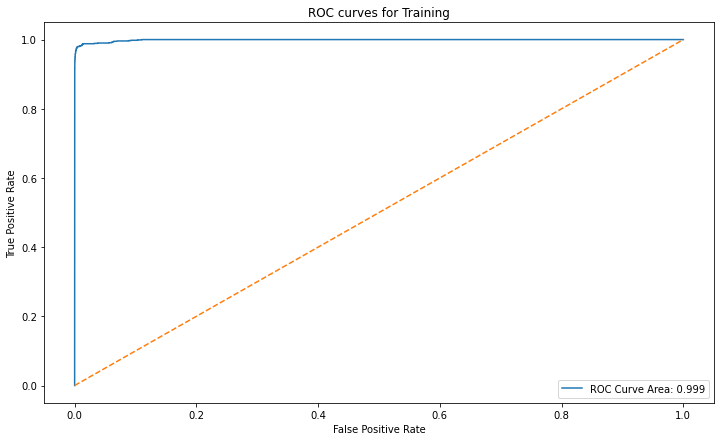

In [44]:
calculate_model_summary(aps_train_df_y.values, y_train_pred, y_train_pred_prob, "Training", is_for_xgboost=True)

Accuracy Score is: 0.9908


Confusion Matrix is: 
[[15596    29]
 [  119   256]]


ROC AUC Score is: 0.8404




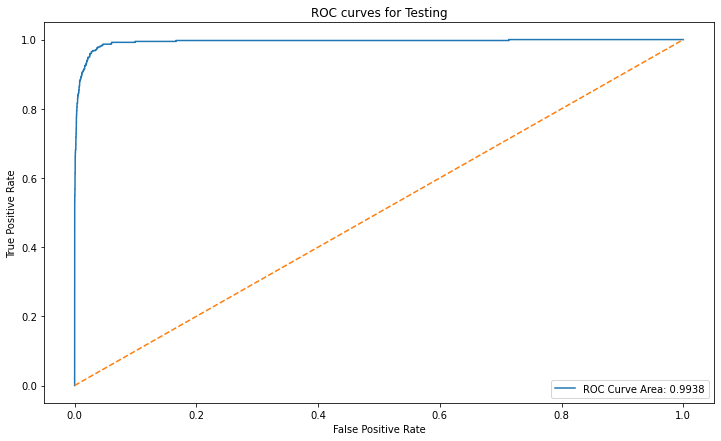

In [45]:
calculate_model_summary(aps_test_df_y, y_test_pred, y_test_pred_prob, "Testing", is_for_xgboost=True)

**1(f). Use SMOTE (Synthetic Minority Over-sampling Technique) to pre-process your data to compensate for class imbalance. Train XGBosst with $L1$-penalized logistic regression at each node using the pre-processed data and repeat 1e. Do not forget that there is a right and a wrong way of cross validation here. Compare the uncompensated case with SMOTE case**

In [46]:
y_train = aps_train_df_y
y_test = aps_test_df_y
y_train

,class
0,0
1,0
2,0
3,0
4,0
...,...
59995,0
59996,0
59997,0
59998,0


In [47]:
smote = SMOTE()
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)

In [48]:
estimator

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.3,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0.2, reg_lambda=1, ...)

In [49]:
data = {
    "Before SMOTE": y_train.value_counts(),
    "After SMOTE": y_train_smote.value_counts()
}

df = pd.DataFrame(data=data)
df

,Before SMOTE,After SMOTE
class,,
0,59000,59000
1,1000,59000


In [50]:
cv = KFold(n_splits=5,shuffle=True,random_state=11)
grid_smote = GridSearchCV(estimator, 
                       param_grid, 
                       n_jobs=-1, 
                       cv=cv, 
                       scoring="accuracy")
grid_smote.fit(x_train_smote, y_train_smote)

GridSearchCV(cv=KFold(n_splits=5, random_state=11, shuffle=True),
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     callbacks=None, colsample_bylevel=1,
                                     colsample_bynode=1, colsample_bytree=0.3,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=0, gpu_id=-1,
                                     grow_policy='depthwise',
                                     importance_type=None,
                                     interaction_constraints=...
                                     max_cat_to_onehot=4, max_delta_step=0,
                                     max_depth=5, max_leaves=0,
                                     min_child_weight=1, missing=nan,
                                     monotone_constraints='()',
                                     n_estimators=100, n_jobs=0,
                                     num_parallel_tree=1, predictor='auto',
                                     random_state=0, reg_alpha=0.2,
                                     reg_lambda=1, ...),
             n_jobs=-1,
             param_grid={'reg_alpha': [0.01, 0.05, 0.07, 0.08, 0.09, 0.1, 0.2,
                                       0.5, 0.75, 1, 2, 3, 4, 5, 10, 20, 50,
                                       100, 200]},
             scoring='accuracy')

In [51]:
print('The best alpha is ',grid_smote.best_params_, ' with a cross validation accuracy of ',round(grid_smote.best_score_,4))

The best alpha is  {'reg_alpha': 0.2}  with a cross validation accuracy of  0.9944


In [52]:
alpha_value = grid_smote.best_params_['reg_alpha']

estimator_smote = XGBClassifier(objective='binary:logistic',
                          reg_alpha=alpha_value,
                          colsample_bytree = 0.3, 
                          learning_rate = 0.1,
                          max_depth = 5,
                          use_label_encoder=False,)
y_train['class'].replace({'neg':0,'pos':1},inplace=True)
estimator_smote.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.3,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0.2, reg_lambda=1, ...)

In [53]:
y_train_pred = estimator_smote.predict(x_train)
y_train_pred_prob = estimator_smote.predict_proba(x_train)

y_test_pred = estimator_smote.predict(x_test)
y_test_pred_prob = estimator_smote.predict_proba(x_test)

Accuracy Score is: 0.9981


Confusion Matrix is: 
[[58994     6]
 [  110   890]]


ROC AUC Score is: 0.9449




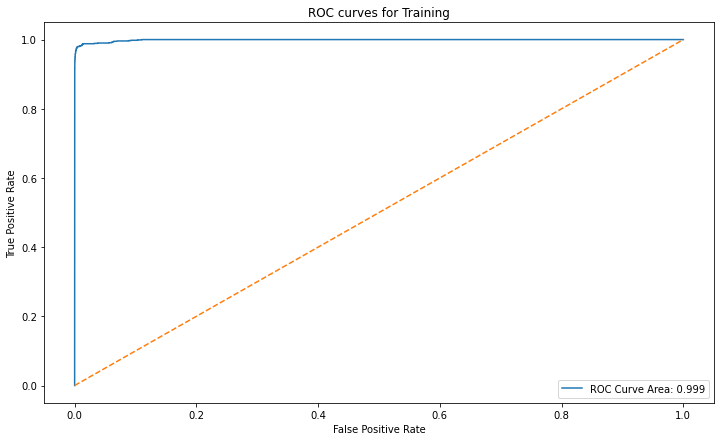

In [54]:
calculate_model_summary(y_train.values, y_train_pred, y_train_pred_prob, "Training", is_for_xgboost=True)

Accuracy Score is: 0.9908


Confusion Matrix is: 
[[15596    29]
 [  119   256]]


ROC AUC Score is: 0.8404




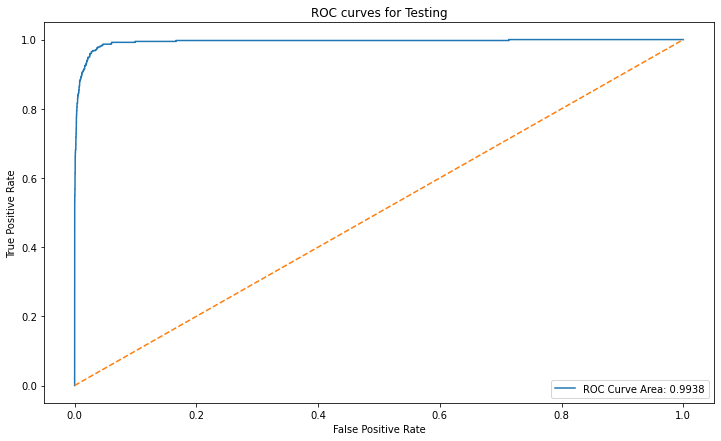

In [55]:
calculate_model_summary(y_test, y_test_pred, y_test_pred_prob, "Testing", is_for_xgboost=True)

### 2. ISLR 6.6.3

**Suppose we estimate the regression coefficients in a linear regression model by minimizing for a particular value of s. For parts (a) through (e), indicate which of i. through v. is correct. Justify your answer.**

**(a) As we increase s from 0, the training RSS will:**
**i. Increase initially, and then eventually start decreasing in an inverted U shape.  
ii. Decrease initially, and then eventually start increasing in a U shape.  
iii. Steadily increase.  
iv. Steadily decrease.  
v. Remain constant.**

Ans: Steadily Decrease: The value of the estimated coefficients will go from 0 to their OLS value when the value of s increases. This is the reason that training RSS will decrease steadily.


**(b) Repeat (a) for test RSS.**  
Ans: Decrease Initially and then eventually starts increasing in a new shape. The test RSS will decrease to a certain level after which it will hit an inflection point and the test residual sum error will start to increase.

**(c) Repeat (a) for variance.**  
Ans: Steadily Increases: $\beta$ is almost zero in the beginning which would mean that there is almost no variance in the beginning. It is only after the module becomes flexible does the variance start to go up.

**(d) Repeat (a) for (squared) bias.**  
Ans: Steadily Decrease: Due to the bias-variance trade-off, since the variance is increasing, the bias will decrease.

**(e) Repeat (a) for the irreducible error.**  
Ans: Irreducible error is act of god and is present in any machine learning model that is built and hence it will remain constant.

### 3. ISLR 6.6.5

**It is well-known that ridge regression tends to give similar coefficient values to correlated variables, whereas the lasso may give quite different coefficient values to correlated variables. We will now explore this property in a very simple setting. Suppose that $n = 2, p = 2, x_{11} = x_{12}, x_{21} = x_{22}$. Furthermore, suppose that $y1 +y2 = 0$ and $x11 +x21 = 0$ and $x_{12} +x_{22} = 0$, so that the estimate for the intercept in a least squares, ridge regression, or lasso model is zero: $\beta_0$ = 0.**

**a) Write out the ridge regression optimization problem in this setting.**

**b) Argue that in this setting, the ridge coefficient estimates satisfy $β_1 = β_2$.**

**c) Write out the lasso optimization problem in this setting.**

**d) Argue that in this setting, the lasso coefficients $β_1$ and $β_2$ are not unique—in other words, there are many possible solutions to the optimization problem in (c). Describe these solutions.**

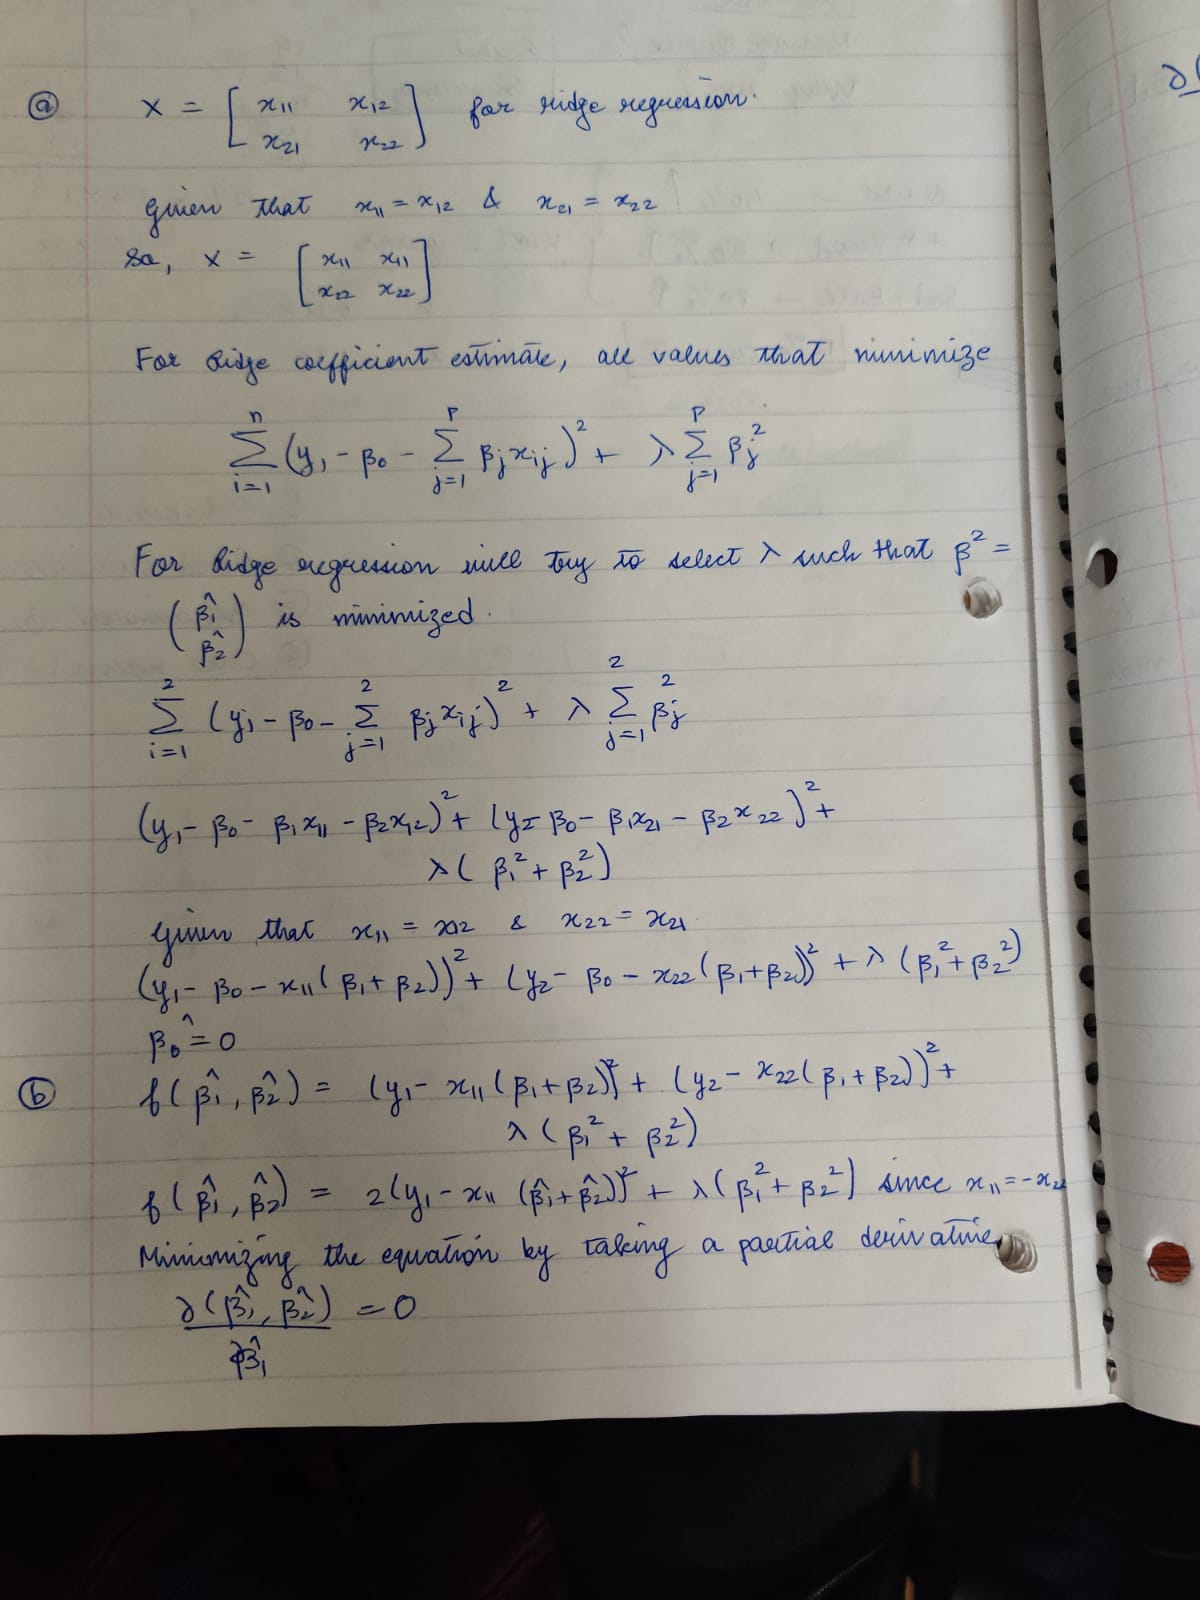

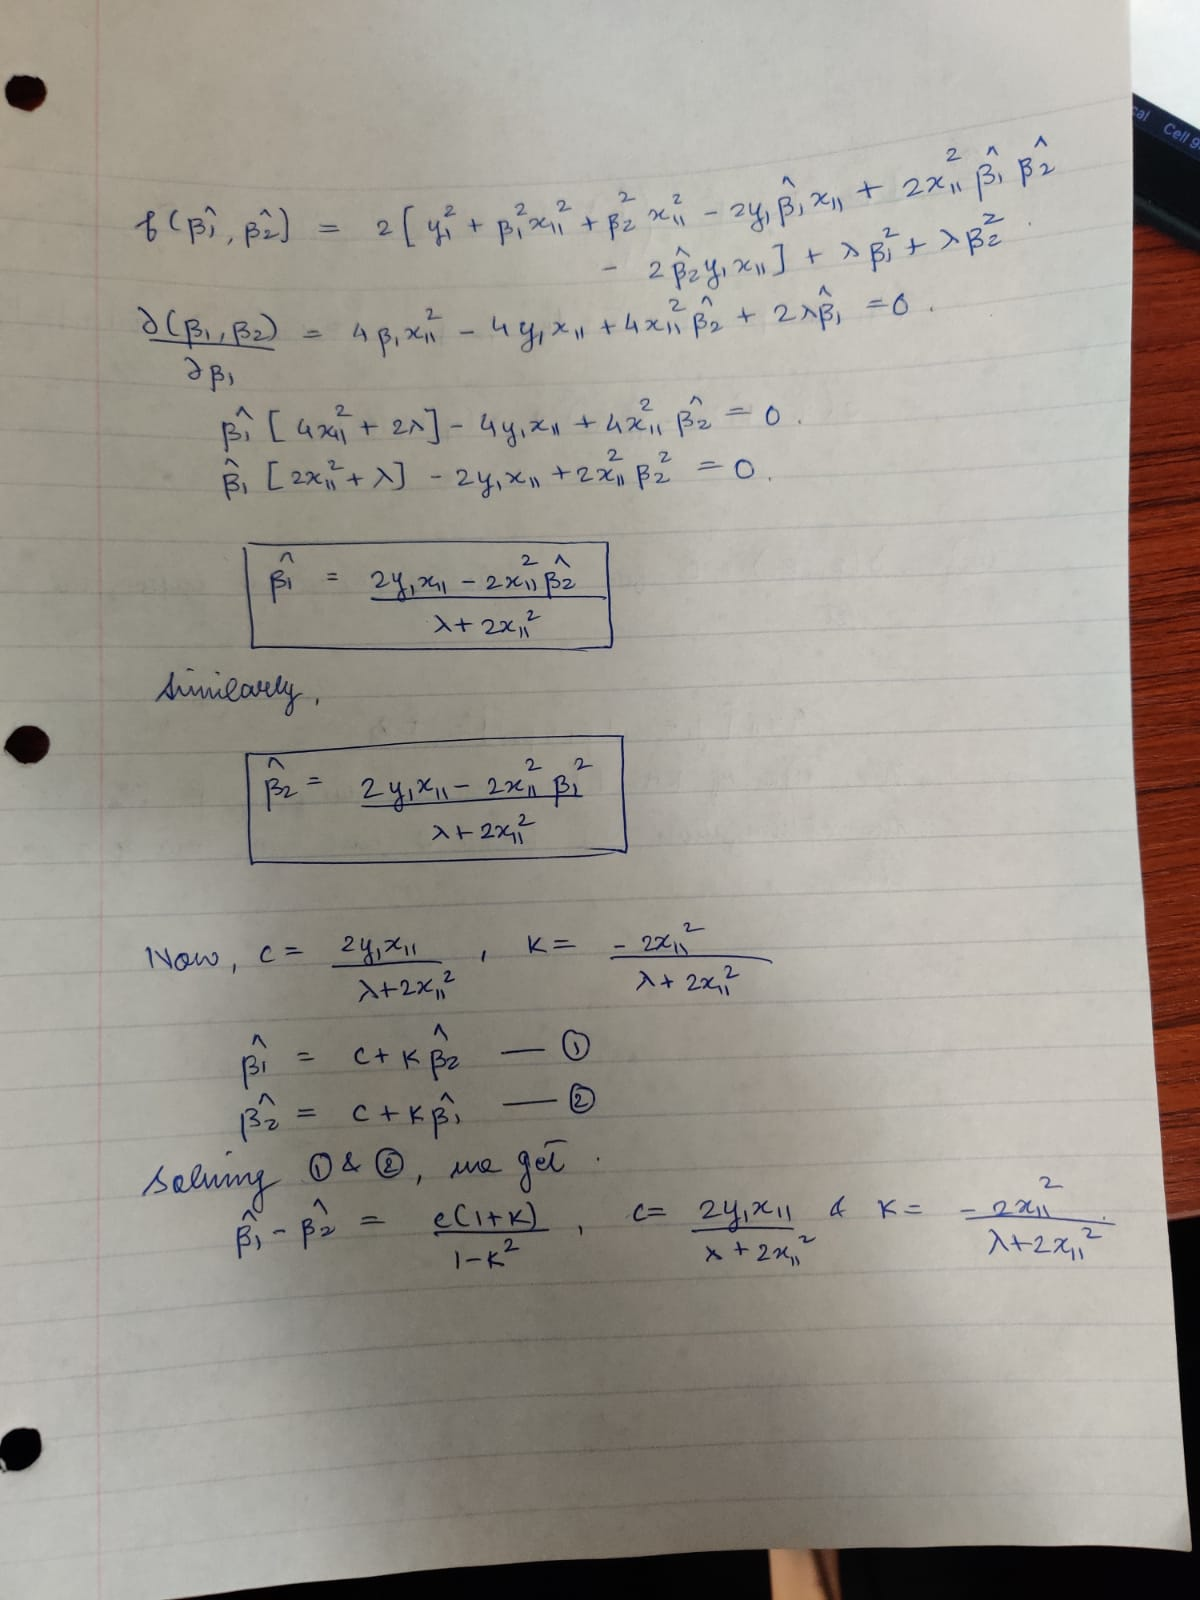

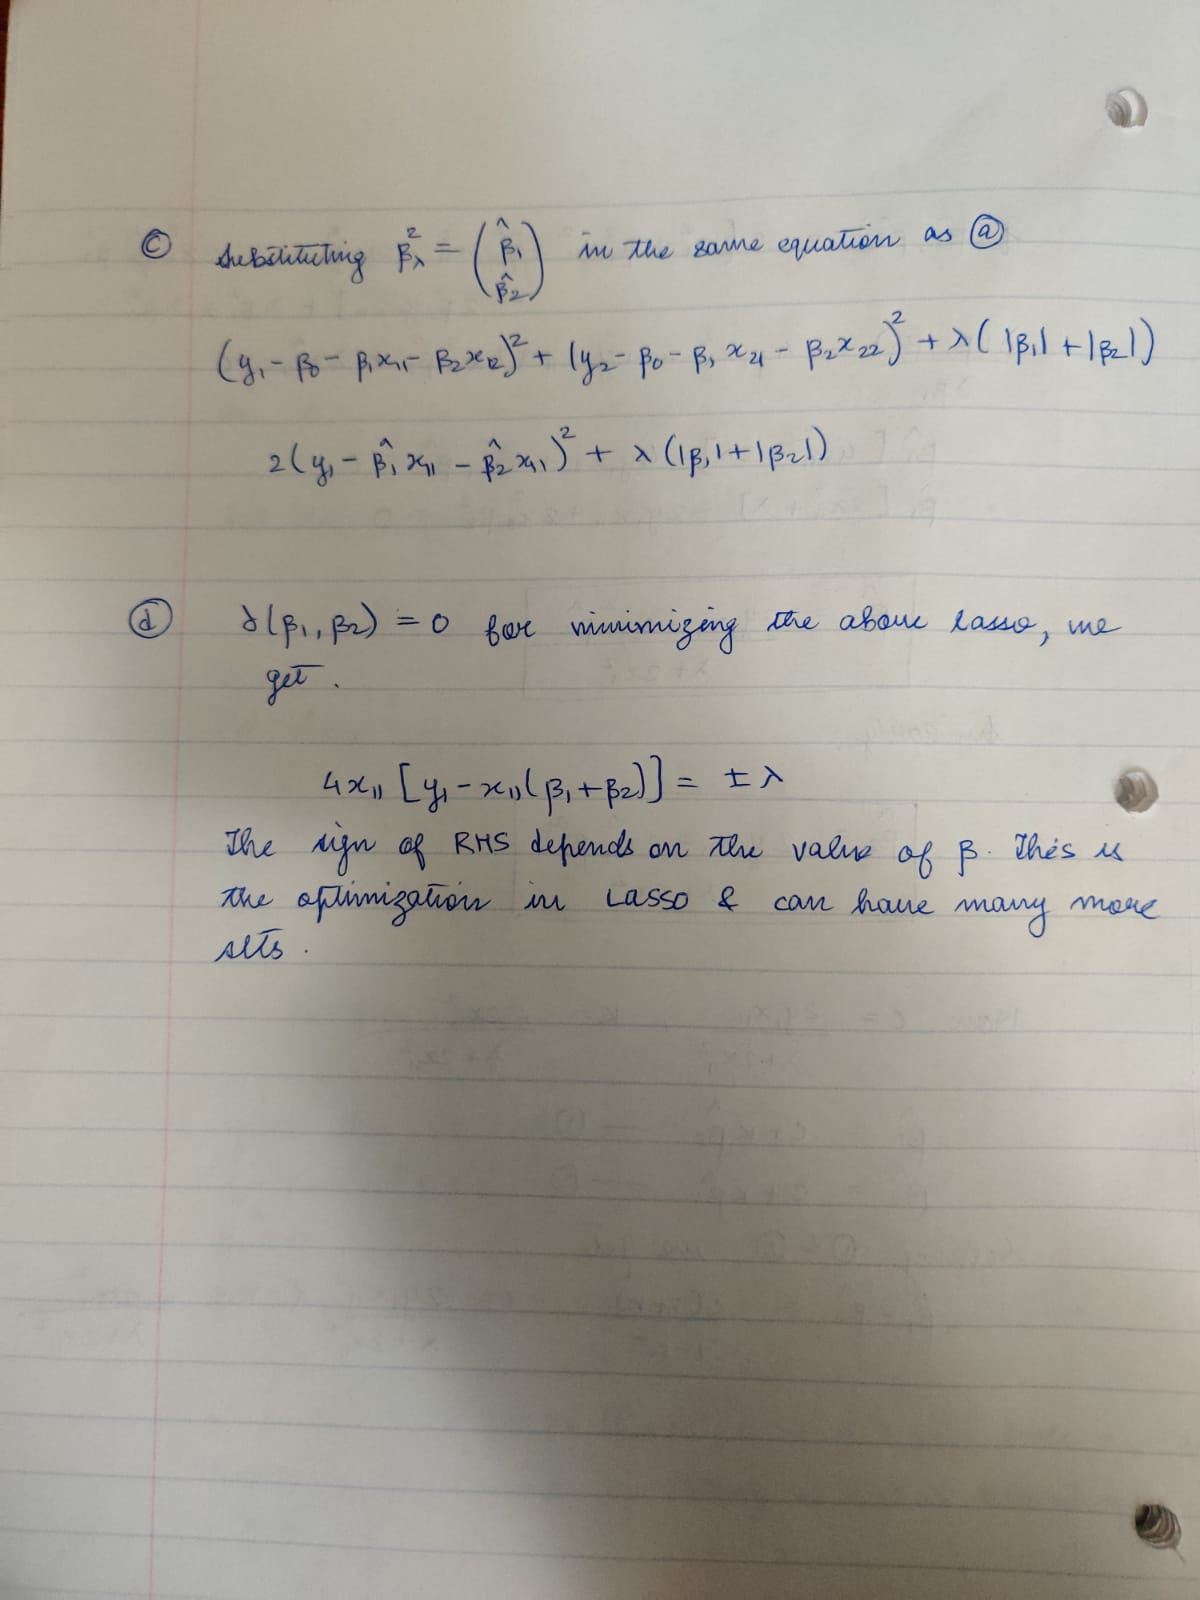

### 4. ISLR 8.4.5

**Suppose we produce ten bootstrapped samples from a data set containing red and green classes. We then apply a classification tree to each bootstrapped sample and, for a specific value of X, produce 10 estimates of P(Class is Red|X):
0.1, 0.15, 0.2, 0.2, 0.55, 0.6, 0.6, 0.65, 0.7, and 0.75.  
There are two common ways to combine these results together into a single class prediction. One is the majority vote approach discussed in this chapter. The second approach is to classify based on the average probability. In this example, what is the final classification under each of these two approaches?**

Ans: **Majority Polling**: In this, probabilities >= 0.5 will be true and the classification will be false otherwise. False = 4 and True = 6 and hence, the red samples are larger than green samples and so the classification will be **red class**.

Ans: **Average Probability**: Mean for given probabilities = 0.45 hence the final prediction is **green**.

### 5. ISLR 9.7.3

**Here we explore the maximal margin classifier on a toy data set.  
(a) We are given $n = 7$ observations in $p = 2$ dimensions. For each observation, there is an associated class label. Sketch the observations**

In [56]:
data={'X1':[3,2,4,1,2,4,4],'X2':[4,2,4,4,1,3,1],'Y':['red','red','red','red','blue','blue','blue']}
df = pd.DataFrame(data)
df

,X1,X2,Y
0,3,4,red
1,2,2,red
2,4,4,red
3,1,4,red
4,2,1,blue
5,4,3,blue
6,4,1,blue


<AxesSubplot:xlabel='X1', ylabel='X2'>

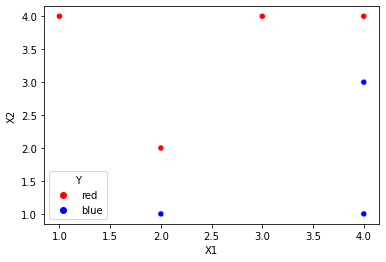

In [57]:
sns.scatterplot(data=df, x="X1", y="X2", hue="Y", palette=['red', 'blue'])

In [58]:
df['Y'].replace({'red': 0, 'blue': 1}, inplace=True)
x_train = df.drop(['Y'], axis=1)
y_train = df['Y']
x_train

,X1,X2
0,3,4
1,2,2
2,4,4
3,1,4
4,2,1
5,4,3
6,4,1


In [59]:
y_train

0    0
1    0
2    0
3    0
4    1
5    1
6    1
Name: Y, dtype: int64

In [60]:
from sklearn import svm
model = svm.SVC(kernel='linear', C=1000)
model.fit(x_train, y_train)

SVC(C=1000, kernel='linear')

In [61]:
y_pred = model.predict(x_train)
y_pred

array([0, 0, 0, 0, 1, 1, 1])

In [62]:
sample_df = df

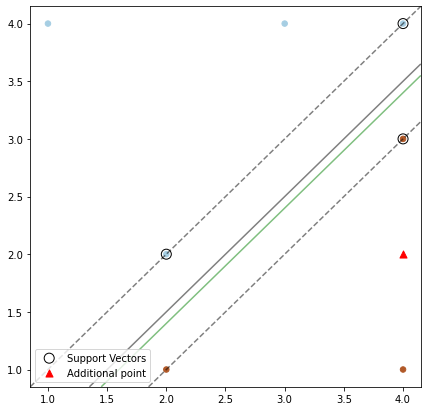

[-1.0004096] [[ 1.9998464 -1.9996928]]


In [63]:
# plot graph
fig, ax = plt.subplots(figsize=(7, 7))

# scatter plot of sample points
ax.scatter(sample_df.iloc[:, 0], sample_df.iloc[:, 1], 
           c=sample_df.iloc[:, -1], s=30, 
           cmap=plt.cm.Paired)

# create a grid
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = model.decision_function(xy).reshape(XX.shape)

# hyperplane
lines1 = ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'], label="Decision Boundary")

# support vectors
ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k', label="Support Vectors")

# a hyperplane that is not optimal
lines2 = ax.contour(XX, YY, Z - 0.2, colors='g', levels=[0], alpha=0.5,
           linestyles=['-'])

# point make the data NOT linear-separable
ax.scatter([4.0], [2.0], color='r', marker='^', s=50, label="Additional point")

ax.legend()
plt.show()

print(model.intercept_, model.coef_)

**(b) Sketch the optimal separating hyperplane, and provide the equation for this hyperplane (of the form (9.1))**  
Ans: The solid black/grey line is the hyperplane

**(c) Describe the classification rule for the maximal margin classifier. It should be something along the lines of “Classify to Red if $\beta_0 + \beta_1x_1 + \beta_2x_2 > 0$, and classify to Blue otherwise.” Provide the values for $\beta_0, \beta_1, and \beta_2$.**  
Ans: The parameters are as follows:  
$\beta_0 = 1$, $\beta_1 = -1$ and $\beta_2 = 2$  
$\beta_0 + \beta_1X_1 + \beta_2X_2 > 0$ => red, otherwise, blue

**(d) On your sketch, indicate the margin for the maximal margin hyperplane.**  
Ans: The dashed line indicates the maximal margin.

**(e) Indicate the support vectors for the maximal margin classifier.**  
Ans: The circled ones are the support vectors

**(f) Argue that a slight movement of the seventh observation would not affect the maximal margin hyperplane**  
Ans: The seventh point is far away from the maximal margin hyperplane. If it is on the edge of the decision boundary, it will have effects, but it does not.

**(g) Sketch a hyperplane that is not the optimal separating hyperplane, and provide the equation for this hyperplane.**  
Ans: The solid green line

**(h) Draw an additional observation on the plot so that the two classes are no longer separable by a hyperplane**
Ans: The new point marked as a red triangle. This makes the points from an XOR pattern which is not linearly separable.

**References:**
> - https://stackoverflow.com/questions/37612434/what-are-ways-to-speed-up-seaborns-pairplot
> - https://imbalanced-learn.org/stable/references/generated/imblearn.ensemble.BalancedRandomForestClassifier.html
> - https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html